In [2]:
import numpy as np
import random
import math
import csv
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [3]:
Y = []
class_names = []
found = False;
# lire dans le fichier csv
with open(r'C:\Users\gaspa\OneDrive\Bureau\COURS\ING 5\Semestre 1\Machine Learning\GTI770_label_data_set.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        found = False;
        # ne pas lire la première ligne
        if row[1] != "class":
            # permet d'ajouter les différentes classes à la liste 
            for i in range(len(class_names)):
                if row[1] == class_names[i][0]:
                    # commence le compte pour cette classe
                    if len(class_names[i]) == 0:
                        class_names[i].append(1)
                    # incrémente le compte pour atteindre 50
                    else :
                        class_names[i][1] += 1
                    found = True
            # si la classe n'existe pas encore on la rajoute. Permet de travailler avec n classes
            if found == False:
                    class_names.append([row[1]])
                    class_names[len(class_names)-1].append(1)
            for i in range(len(class_names)):
                # on verifie si la classe n'a pas encore atteind le nombre 50 pour ajouter le nouvel id
                if row[1] == class_names[i][0] and class_names[i][1] <= 50:
                    Y.append(row)
print("forme de Y" + str(np.shape(Y)))
url=''
n= []
for j in range(len(Y)):
    # creation de l'url correspond à l'id de l'image
    url = "C:/Users/gaspa/OneDrive/Bureau/COURS/ING 5/Semestre 1/Machine Learning/images_training/" + Y[j][0] + '.jpg'
    #print(url)
    i = plt.imread(url)
    n.append(i)
# creation de la matriced'image
X = np.array(n)
#print(X)
print("forme de X" + str(X.shape))

forme de Y(100, 2)
forme de X(100, 424, 424, 3)


In [4]:
#Separate the input into training and test set
i = 0
k = 0
j = 0
Y_train = []
Y_test = []
x_tr = []
x_te = []

# tant que 35 spirales et 35 smooths n'ont pas été ajoutées, on ajoute l'image dans le train
while i<=35 and k<=35 and j<100:
    if Y[j][1] == "smooth" and i <= 34:
        Y_train.append(Y[j])
        x_tr.append(X[j])
        i += 1
    if Y[j][1] == "spiral" and k < 35:
        Y_train.append(Y[j])
        x_tr.append(X[j])
        k += 1
    j += 1
# ajout des 30% dans la partie test
for m in range(0,30):
    Y_test.append(Y[m])
    x_te.append(X[m])

X_train = np.array(x_tr)
X_test = np.array(x_te)

In [5]:
# crop image
f = []
for i in range(len(X_train)):
    # on crée une image en gardant uniquement les pixels entre 188 et 238 pi
    img_cropped = X_train[i][148:278, 148:278, :]
    f.append(img_cropped)
    
X_train_crop = np.array(f)
# confirm cropped image shape
print(X_train_crop[65].shape)
print(len(X_train_crop))

(130, 130, 3)
70


In [11]:
#Fonction pour convertir une image RGB en image Gray Scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) #On applique sur l'image en entrée un filtre

#Fonction de binairisation 
def ToBinary(x):
    #Conversion de l'image RGB en image grayscale 
    im = rgb2gray(x)
    
    #Binairisation autour de la valeur 127
    im_b = (im >185)*255
    #plt.figure()
    #plt.imshow(x)
    #plt.figure()
    #plt.imshow(im)
    #plt.figure()
    #plt.imshow(im_b)
    return im_b

X_train_binary=np.arange(1183000).reshape(70,130,130) #Création d'un tableau pour stocker les images

for i in range(0,70,1): #Binairisation de toutes les images d'entrainement  
    X_train_binary[i]=ToBinary(X_train_crop[i])


63
62
39


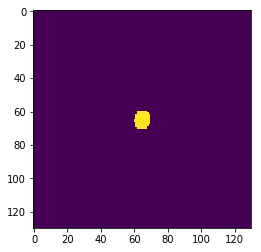

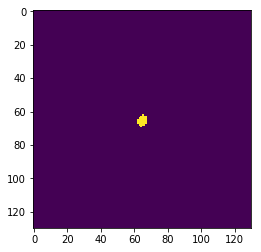

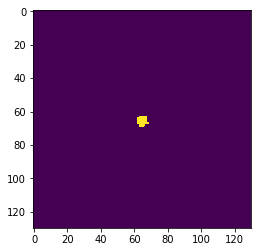

In [12]:
# choose random images from spiral
x = 0
while x < 3:
    random_nb = random.randint(0,69)
    if Y[random_nb][1] == "spiral":
        print(random_nb)
        img = X_train_binary[random_nb]
        plt.figure()
        plt.imshow(img)
        x += 1

34
38
23


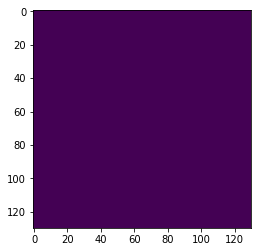

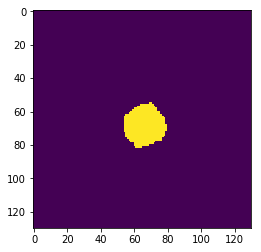

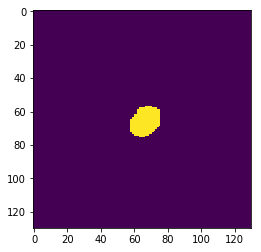

In [46]:
# choose random images from smooth
x = 0
while x < 3:
    random_nb = random.randint(0,69)
    if Y[random_nb][1] == "smooth":
        print(random_nb)
        img = X_train_binary[random_nb]
        plt.figure()
        plt.imshow(img)
        x += 1

In [24]:
#img = X_train_crop[50]
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#sift = cv2.xfeatures2d.SIFT_create()
#kp = sift.detect(gray,None)

#img=cv2.drawKeypoints(gray,kp,outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#cv2.imwrite('sift_keypoints.jpg',img)

#plt.figure()
#plt.imshow(img)

In [25]:
X_train_plot = []
for i in range(len(X_train_binary)):
    img = X_train_binary[i]
    numberOfOne = np.count_nonzero(img)
    numberOfZero = (img.shape[0]*img.shape[1])-numberOfOne
    X_train_plot.append([])
    X_train_plot[i].append(numberOfOne)
    X_train_plot[i].append(numberOfZero)
print(X_train_plot)


moy_one_sm =0
moy_one_sp=0
moy_zero_sm=0
moy_zero_sp = 0
for i in range(len(Y_train)):
    # si l'img est une spirale, on ajoute le nombre de points blanc et noir
    if Y_train[i][1] == "spiral":
        moy_one_sp += X_train_plot[i][0]
        moy_zero_sp += X_train_plot[i][1]
    # si l'img est smooth, on ajoute le nombre de points blanc et noir
    else:
        moy_one_sm += X_train_plot[i][0]
        moy_zero_sm += X_train_plot[i][1]
# calcul des moyennes de blanc et noir pour chaque classe (smooth,spiral)
moy_one_sp = moy_one_sp/35
moy_zero_sp = moy_zero_sp/35
moy_one_sm = moy_one_sm/35
moy_zero_sm = moy_zero_sm/35
print("Spiral: one-" + str(moy_one_sp) + " zero-" + str(moy_zero_sp))
print("Smooth: one-" + str(moy_one_sm) + " zero-" + str(moy_zero_sm))

[[40, 16860], [0, 16900], [0, 16900], [0, 16900], [10, 16890], [366, 16534], [8, 16892], [18, 16882], [83, 16817], [485, 16415], [0, 16900], [3, 16897], [0, 16900], [94, 16806], [0, 16900], [0, 16900], [1, 16899], [0, 16900], [21, 16879], [0, 16900], [0, 16900], [0, 16900], [0, 16900], [265, 16635], [37, 16863], [18, 16882], [0, 16900], [0, 16900], [129, 16771], [0, 16900], [54, 16846], [0, 16900], [158, 16742], [0, 16900], [0, 16900], [0, 16900], [60, 16840], [0, 16900], [514, 16386], [37, 16863], [0, 16900], [0, 16900], [0, 16900], [0, 16900], [262, 16638], [26, 16874], [71, 16829], [0, 16900], [191, 16709], [41, 16859], [93, 16807], [0, 16900], [18, 16882], [0, 16900], [48, 16852], [0, 16900], [61, 16839], [0, 16900], [321, 16579], [1, 16899], [285, 16615], [433, 16467], [33, 16867], [90, 16810], [13, 16887], [0, 16900], [58, 16842], [0, 16900], [52, 16848], [111, 16789]]
Spiral: one-13.457142857142857 zero-16886.542857142857
Smooth: one-118.22857142857143 zero-16781.77142857143


In [26]:
smooth = 0
spiral = 0
error = 0
for i in range(len(X_train_plot)):
    if X_train_plot[i][0] > 50:
        smooth += 1
        if Y_train[i][1] == "spiral" :
            error += 1
            #print("smooth and y is egual to " + str(Y_train[i][1]))
    else:
        spiral += 1  
        if Y_train[i][1] == "smooth" :
            error += 1
            #print("spiral and y is egual to " + str(Y_train[i][1]))
print(error)
print("smooth images : " + str(smooth))
print("spiral images : " + str(spiral))

21
smooth images : 22
spiral images : 48


In [27]:
img = X_train_crop[50]
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#plt.figure()
#plt.imshow(imgray)

#ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#imgage, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, -1, (0,255,0), 3)

#plt.figure()
#plt.imshow(img)
#print(img[1].shape)
#print(imgray.shape)

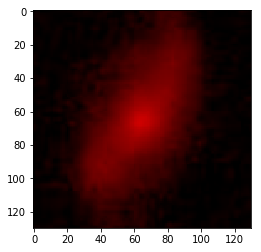

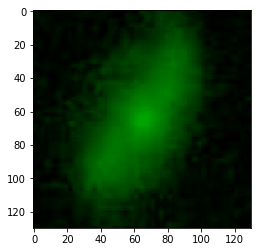

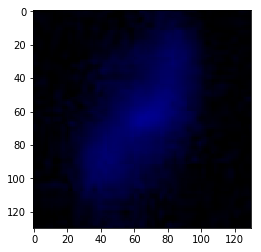

In [28]:
img = X_train_crop[22]

#b, g, r = cv2.split(data)
#ttl = data.size / 3 #divide by 3 to get the number of image PIXELS

"""b, g, and r are actually numpy.ndarray types,
so you need to use the appropriate method to sum
all array elements"""
#print(b)

# shape attribute of an image matrix gives the dimensions
row,col,plane = img.shape

# here image is of class 'uint8', the range of values  
# that each colour component can have is [0 - 255]

# create a zero matrix of order same as
# original image matrix order of same dimension
temp = np.zeros((row,col,plane),np.uint8)

# store blue plane contents or data of image matrix
# to the corresponding plane(blue) of temp matrix
temp[:,:,0] = img[:,:,0]

# displaying the Blue plane image
cv2.imshow('Blue plane image',temp)

plt.figure()
plt.imshow(temp)

# again take a zero matrix of image matrix shape
temp = np.zeros((row,col,plane),np.uint8)

# store green plane contents or data of image matrix
# to the corresponding plane(green) of temp matrix
temp[:,:,1] = img[:,:,1]

# displaying the Green plane image
cv2.imshow('Green plane image',temp)

plt.figure()
plt.imshow(temp)

# again take a zero matrix of image matrix shape
temp = np.zeros((row,col,plane),np.uint8)

# store red plane contents or data of image matrix
# to the corresponding plane(red) of temp matrix
temp[:,:,2] = img[:,:,2]

# displaying the Red plane image
cv2.imshow('Red plane image',temp)

plt.figure()
plt.imshow(temp)


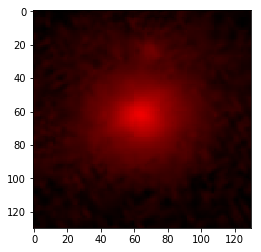

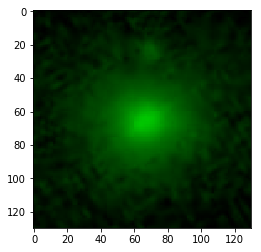

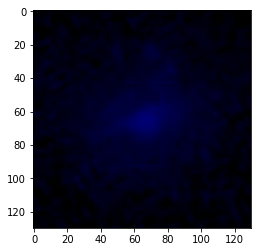

In [29]:
img = X_train_crop[36]

#b, g, r = cv2.split(data)
#ttl = data.size / 3 #divide by 3 to get the number of image PIXELS

"""b, g, and r are actually numpy.ndarray types,
so you need to use the appropriate method to sum
all array elements"""
#print(b)

# shape attribute of an image matrix gives the dimensions
row,col,plane = img.shape

# here image is of class 'uint8', the range of values  
# that each colour component can have is [0 - 255]

# create a zero matrix of order same as
# original image matrix order of same dimension
temp = np.zeros((row,col,plane),np.uint8)

# store blue plane contents or data of image matrix
# to the corresponding plane(blue) of temp matrix
temp[:,:,0] = img[:,:,0]

# displaying the Blue plane image
cv2.imshow('Blue plane image',temp)

plt.figure()
plt.imshow(temp)

# again take a zero matrix of image matrix shape
temp = np.zeros((row,col,plane),np.uint8)

# store green plane contents or data of image matrix
# to the corresponding plane(green) of temp matrix
temp[:,:,1] = img[:,:,1]

# displaying the Green plane image
cv2.imshow('Green plane image',temp)

plt.figure()
plt.imshow(temp)

# again take a zero matrix of image matrix shape
temp = np.zeros((row,col,plane),np.uint8)

# store red plane contents or data of image matrix
# to the corresponding plane(red) of temp matrix
temp[:,:,2] = img[:,:,2]

# displaying the Red plane image
cv2.imshow('Red plane image',temp)

plt.figure()
plt.imshow(temp) 

ratio bleu/rouge : 0.5313518053687691 / 0.4686481946312309  b: 328326 , g: 328962 ,r: 289581
ratio bleu/rouge : 0.6844165509468388 / 0.3155834490531612  b: 541663 , g: 426334 ,r: 249760
203.0
103.0
244.0
129.0


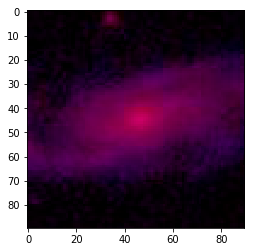

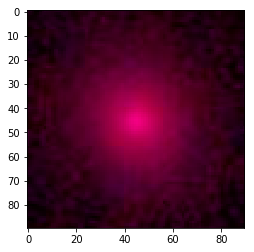

In [63]:
# crop image
f = []
for i in range(len(X_train)):
    # on crée une image en gardant uniquement les pixels entre 188 et 238 pi
    img_c = X_train[i][168:258, 168:258, :]
    img_cropped = img_c[35:55, 35:55, :]
    #img_cropped = img_c[35:55, 35:55, :]
    f.append(img_c)
    
X_train_crop_little = np.array(f)
b = 0
r = 0
g = 0
b2 = 0
g2 = 0
r2 = 0
img = X_train_crop_little[3]#spiral 21 26 3 47 55 51
bp,gp,rp = cv2.split(img)
for row in range (len(bp)):
    for col in range(len(bp[row])):
        b += bp[row][col]
        r += rp[row][col]
        g += gp[row][col]

img2 = X_train_crop_little[24]#smooth 44 28 24 56 34
bp2,gp2,rp2 = cv2.split(img2)
for row in range (len(bp)):
    for col in range(len(bp[row])):
        b2 += bp2[row][col]
        r2 += rp2[row][col]
        g2 += gp2[row][col]
print("ratio bleu/rouge : " + str(b/(b+r)) + " / " + str(r/(b+r)) + "  b: " + str(b) + " , g: " + str(g) + " ,r: " + str(r))
print("ratio bleu/rouge : " + str(b2/(b2+r2)) + " / " + str(r2/(b2+r2)) + "  b: " + str(b2) + " , g: " + str(g2) + " ,r: " + str(r2))
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(bp, mask = None)
print(maxVal)
(minValr, maxValr, minLocr, maxLocr) = cv2.minMaxLoc(rp, mask = None)
print(maxValr)
(minVal2, maxVal2, minLoc2, maxLoc2) = cv2.minMaxLoc(bp2, mask = None)
print(maxVal2)
(minValr2, maxValr2, minLocr2, maxLocr2) = cv2.minMaxLoc(rp2, mask = None)
print(maxValr2)
row,col,plane = img.shape
temp = np.zeros((row,col,plane),np.uint8)
temp[:,:,0] = img[:,:,0]
temp[:,:,2] += img[:,:,2]
plt.figure()
plt.imshow(temp) 
temp = np.zeros((row,col,plane),np.uint8)
temp[:,:,0] = img2[:,:,0]
temp[:,:,2] += img2[:,:,2]
plt.figure()
plt.imshow(temp) 

In [70]:
smooth = 0
spiral = 0
error = 0
for i in range(len(Y_train)):
    img = X_train_crop_little[i]
    ratiob = 0
    ratior = 0
    b = 0
    r = 0
    g = 0
    b2 = 0
    g2 = 0
    r2 = 0
    bp,gp,rp = cv2.split(img)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(bp, mask = None)
    for row in range (len(bp)):
        for col in range(len(bp[row])):
            b += bp[row][col]
            r += rp[row][col]
            g += gp[row][col]
    ratiob = b/(b+r)
    ratior = r/(b+r)
    #if (b > 501283 and r < 382371 ) or (g > 401413 and r < 382371) or (g > 401413 and b > 621283):
    #print(maxVal)
    if maxVal > 220:
        smooth += 1
        if Y_train[i][1] == "spiral" :
            error += 1
            #print("smooth and y is egual to " + str(Y_train[i][1]))
    else:
        spiral += 1  
        if Y_train[i][1] == "smooth" :
            error += 1
            #print("spiral and y is egual to " + str(Y_train[i][1]))
print(error)
print("smooth images : " + str(smooth))
print("spiral images : " + str(spiral))

14
smooth images : 39
spiral images : 31


In [ ]:
for i in range(len(Y_train)):
    img = X_train_crop_little[i]
    if Y_train[i][1] == "spiral":
        bp,gp,rp = cv2.split(img)
        for row in range (len(bp)):
            for col in range(len(bp[row])):
                b += bp[row][col]
                r += rp[row][col]
                g += gp[row][col]
    else:
        #img2 = X_train_crop_little[56]#smooth
        bp2,gp2,rp2 = cv2.split(img)
        for row in range (len(bp)):
            for col in range(len(bp[row])):
                b2 += bp2[row][col]
                r2 += rp2[row][col]
                g2 += gp2[row][col]
                
                
img = X_train_crop_little[47]#spiral 21 26 3 47 55 51
bp,gp,rp = cv2.split(img)
for row in range (len(bp)):
    for col in range(len(bp[row])):
        b += bp[row][col]
        r += rp[row][col]
        g += gp[row][col]

img2 = X_train_crop_little[56]#smooth
bp2,gp2,rp2 = cv2.split(img2)
for row in range (len(bp)):
    for col in range(len(bp[row])):
        b2 += bp2[row][col]
        r2 += rp2[row][col]
        g2 += gp2[row][col]